## Projet 4. Réalisez une étude de santé publique avec R ou Python

# Food and Agriculture Organization of the United Nation

### 1) Préparation des données

In [1]:
#importation des data sets (library panda)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import matplotlib.ticker as ticker

In [2]:
#Gestion des options d'affichage 
pd.set_option('display.max_row',1000)
pd.set_option('display.max_columns',30)

In [3]:
#importation des jeux de données
dfaa = pd.read_csv("aide_alimentaire.csv")
dfda = pd.read_csv("dispo_alimentaire.csv")
dfp = pd.read_csv("population.csv")
dfsn = pd.read_csv("sous_nutrition.csv")

In [4]:
# indexation des dataframe
aide_alimentaire_filename='aide_alimentaire.csv'
dispo_alimentaire_filename='dispo_alimentaire.csv'
population_filename='population.csv'
sous_nutrition_filename='sous_nutrition.csv'
continent_filename='continent.csv'
aide_alimentaire=pd.read_csv(aide_alimentaire_filename, sep=',')
dispo_alimentaire=pd.read_csv(dispo_alimentaire_filename, sep=',')
population=pd.read_csv(population_filename, sep=',',)
sous_nutrition=pd.read_csv(sous_nutrition_filename, sep=',')
continent=pd.read_csv(continent_filename, sep=',')

# Nettoyage des bases de données.

1)  Remplacer les NaN par 0 dans le tableau dispo_alimentaire  (Bolléenne)

In [5]:
dispo_alimentaire.fillna(0, inplace=True)

2) Supprimer les pays sans les personnes en sous_nutrition du tableau sous_nutrition

In [6]:
sous_nutrition.dropna(inplace=True)

3) Remplacer les intervalles d’années par les année correspondantes

In [7]:
sous_nutrition.replace(to_replace=['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018', '2017-2019'], 
                       value =[2013, 2014, 2015, 2016, 2017, 2018], inplace=True)

In [8]:
#gestion de l'affichage
pd.set_option('display.max_row',1000)
pd.set_option('display.max_columns',30)

4) Suprimer les valeurs ambigues du tableau sous_nutrition 

In [9]:
sous_nutrition[(sous_nutrition['Valeur'] =='<0.1') & (sous_nutrition['Année'] ==2017)]

,Zone,Année,Valeur
64,Arménie,2017,<0.1
106,Barbade,2017,<0.1
124,Belize,2017,<0.1
196,Cabo Verde,2017,<0.1
232,Chine - RAS de Macao,2017,<0.1
250,Chypre,2017,<0.1
310,Dominique,2017,<0.1
382,Fidji,2017,<0.1
466,Guyana,2017,<0.1
502,Îles Salomon,2017,<0.1


5) Convertir en valeur numérique les valeurs de type 'objet'

In [10]:
indexNames = sous_nutrition[sous_nutrition['Valeur'] =='<0.1'].index 
sous_nutrition.drop(indexNames, inplace=True)
sous_nutrition['Valeur']=sous_nutrition['Valeur'].astype(float) 

Les valeurs '<0.1' sont non signifiantes car leurs valeurs trop approximatives, de  0 à  100 000. 
On note environ 20 pays avec moins de 100 000 personnes en sous_nutrition correspondent à  3,7% des personnes en sous-nutrition au niveau mondiale. Pour continuer l'exploration de ces données il est donc nescessaire d'isoler ces données pour traiter la base de donnée dans son  entiereté


 6) Converter le nombre des personnes en sous-nutrition en milliers d’habitants

In [11]:
sous_nutrition['Valeur']*=1000

7) Supprimer les colonnes du tableau dispo_alimentaire où l'alimentation humaine est negative ¶


In [12]:
dispo_alimentaire.drop(dispo_alimentaire[dispo_alimentaire['Nourriture'] <0].index, inplace=True)
dispo_alimentaire.drop(dispo_alimentaire[dispo_alimentaire['Disponibilité intérieure'] <0].index, inplace=True)

8) Renommer Royaume-Uni et Tchéquie 

In [13]:
dispo_alimentaire.loc[dispo_alimentaire['Zone']=='Royaume-Uni', 'Zone']='Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord'
dispo_alimentaire.loc[dispo_alimentaire['Zone']=='Tchéquie (la)', 'Zone']='Tchéquie'

# Mission 1. Mission de Marc


### Question n°1 :  Calculer la proportion de personnes en état de sous-nutrition (2017)

In [14]:
sous_nutrition_2017=sous_nutrition[sous_nutrition['Année']==2017].drop(columns='Année')
population_2017=population[population['Année']==2017].drop(columns='Année')
print('La proportion de personnes en état de sous-nutrition en 2017 est %.2f' % 
    (sum(sous_nutrition_2017['Valeur'])*100/sum(population_2017['Valeur'])), '%.', sep='')
print('Le nombre de personnes en état de sous-nutrition en 2017 est', 
    sum(sous_nutrition_2017['Valeur']/1000), 'millions d’habitants.')

La proportion de personnes en état de sous-nutrition en 2017 est 7.10%.
Le nombre de personnes en état de sous-nutrition en 2017 est 535.7 millions d’habitants.


### Question n°2 : La disponibilité alimentaire mondiale (2013)

Besoins estimés pour une alimentation saine : 2 300 kcal/hab./jour, en veillant à ce que 12% de l’énergie provienne de protéines (69 g/hab./jour) 
(FAO)

In [15]:
# on prend le minimum de deux valeurs : 
#le nombre de personnes que on peut nourrir par rapport à la disponibilité en kcal, 
#par rapport à la disponibilité de protéines.

population_2013=population[population['Année']==2013].drop(columns='Année')
nombre_kcal=pd.merge(dispo_alimentaire, population_2013, how='left', on='Zone')
nombre_kcal['Disponibilité alimentaire (Kcal/jour)']=nombre_kcal['Valeur']*1000*nombre_kcal['Disponibilité alimentaire (Kcal/personne/jour)']
nombre_kcal['Disponibilité de protéines en quantité (g/jour)']=nombre_kcal['Valeur']*1000*nombre_kcal['Disponibilité de protéines en quantité (g/personne/jour)']
print('La disponibilité alimentaire mondiale en 2013 pourrait nourrir %.0f'
      % min((sum(nombre_kcal['Disponibilité de protéines en quantité (g/jour)'])/6.9), (sum(nombre_kcal['Disponibilité alimentaire (Kcal/jour)'])/2300)), ' personnes.', sep='')


La disponibilité alimentaire mondiale en 2013 pourrait nourrir 8827300528 personnes.


### Question 3) La disponibilité alimentaire mondiale des produits végétaux (2013)

In [16]:
masque_veg=nombre_kcal['Origine']=='vegetale'
masque_not_null=nombre_kcal['Nourriture'] !=0
# on prend le minimum de deux valeurs : 
# le nombre de personnes que on peut nourrir par rapport à la disponibilité en kcal 
# par rapport à la disponibilité de protéines
print('La disponibilité alimentaire mondiale des produits végétaux en 2013 pourrait nourrir %.0f' % min(
    sum(nombre_kcal[masque_veg]['Disponibilité de protéines en quantité (g/jour)'])/6.9, 
    sum(nombre_kcal[masque_veg]['Disponibilité alimentaire (Kcal/jour)'])/2300), ' personnes.', sep='')

La disponibilité alimentaire mondiale des produits végétaux en 2013 pourrait nourrir 7257695246 personnes.


### 4) L'utilisation de la disponibilité intérieure (2013) 

In [17]:
# on compare les valeurs de la disponibilité intérieure calculées de trois manières différentes
print('Disponibilité intérieure est', sum(dispo_alimentaire['Disponibilité intérieure']), 'milliers de tonnes.')
dispo_inter_tot=sum(dispo_alimentaire['Aliments pour animaux'])+sum(dispo_alimentaire['Autres Utilisations'])+sum(dispo_alimentaire['Nourriture'])+sum(dispo_alimentaire['Pertes'])+sum(dispo_alimentaire['Semences'])+sum(dispo_alimentaire['Traitement'])
print('Disponibilité intérieure (utilisations) est', dispo_inter_tot, 'milliers de tonnes.')
print('Disponibilité intérieure (moyens d’acquisition) est', (sum(dispo_alimentaire['Production'])-
      sum(dispo_alimentaire['Exportations - Quantité'])+
      sum(dispo_alimentaire['Importations - Quantité'])+
      sum(dispo_alimentaire['Variation de stock'])), 'milliers de tonnes.')

Disponibilité intérieure est 9854329.0 milliers de tonnes.
Disponibilité intérieure (utilisations) est 9857964.0 milliers de tonnes.
Disponibilité intérieure (moyens d’acquisition) est 9854512.0 milliers de tonnes.


In [18]:
# utiliser la Disponibilité intérieure (utilisations)
# on crée un tableau avec les répartitions des utilisations de la disponibilité alimentaire (les sommes et les proportions)
dispo_inter=pd.DataFrame(data=[[sum(dispo_alimentaire['Aliments pour animaux']), sum(dispo_alimentaire['Aliments pour animaux'])/dispo_inter_tot],
                               [sum(dispo_alimentaire['Autres Utilisations']), sum(dispo_alimentaire['Autres Utilisations'])/dispo_inter_tot],
                               [sum(dispo_alimentaire['Nourriture']), sum(dispo_alimentaire['Nourriture'])/dispo_inter_tot],
                               [sum(dispo_alimentaire['Pertes']), sum(dispo_alimentaire['Pertes'])/dispo_inter_tot],
                               [sum(dispo_alimentaire['Semences']), sum(dispo_alimentaire['Semences'])/dispo_inter_tot],
                               [sum(dispo_alimentaire['Traitement']), sum(dispo_alimentaire['Traitement'])/dispo_inter_tot],
                               [dispo_inter_tot, 1]],
                         index=['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement', 'Total'], 
                         columns=['Utilisation de la disponibilité intérieure', 'Proportion'])

In [19]:
display(dispo_inter.sort_values(['Proportion'], 
                                ascending=True).style.format({'Utilisation de la disponibilité intérieure': "{:.0f}", 
                                                              'Proportion': "{:.2%}"}))

,Utilisation de la disponibilité intérieure,Proportion
Semences,154661,1.57%
Pertes,453675,4.60%
Autres Utilisations,864950,8.77%
Aliments pour animaux,1304176,13.23%
Traitement,2204192,22.36%
Nourriture,4876310,49.47%
Total,9857964,100.00%


La moitié de la disponibilité alimentaire des produits primaires et d'un certain nombre de produits transformés est utilisée comme nourriture (49,47%). 22.36% sont utilisés à la fabrication de produits de transformation. 13,23% sont les aliments pour animaux. 4,6% sont perdus.


# **Mission 2. Mission de Julien** 

### Question 1) Utilisation du manioc par la Thaïlande (2013)

In [20]:
thailande_manioc=np.transpose(dispo_alimentaire[(dispo_alimentaire.Zone=='Thaïlande') & (dispo_alimentaire.Produit=='Manioc')].drop(columns=['Origine', 'Zone', 'Produit']))
thailande_manioc.columns=['Thaïlande-Manioc']

In [21]:
s=pd.Series({'Thaïlande-Manioc' : (population[(population.Zone=='Thaïlande') & (population.Année==2013)]['Valeur'].iloc[0])}, 
            name='Population')
p=pd.Series({'Thaïlande-Manioc' : (sous_nutrition[(sous_nutrition.Zone=='Thaïlande') & (sous_nutrition.Année==2013)]['Valeur'].iloc[0])}, 
            name='Personnes en sous-nutrition')
thailande_manioc=thailande_manioc.append(s).append(p)

In [22]:
thailande_manioc

,Thaïlande-Manioc
Aliments pour animaux,1800.000
Autres Utilisations,2081.000
Disponibilité alimentaire (Kcal/personne/jour),40.000
Disponibilité alimentaire en quantité (kg/personne/an),13.000
Disponibilité de matière grasse en quantité (g/personne/jour),0.050
Disponibilité de protéines en quantité (g/personne/jour),0.140
Disponibilité intérieure,6264.000
Exportations - Quantité,25214.000
Importations - Quantité,1250.000
Nourriture,871.000


In [23]:
# 1er calcul :  nombre de kcal dans manioc par unité (mille tonnes)
# 2ème calcul: ensuite on calcule le nombre de kcal dans manioc exporté
red_exp=thailande_manioc.loc['Population'][0]*1000*thailande_manioc.loc['Disponibilité alimentaire (Kcal/personne/jour)'][0]/thailande_manioc.loc['Nourriture'][0]/2300*thailande_manioc.loc['Personnes en sous-nutrition'][0]/1000
print('Le manioc produit en Thaïlande mais exporté du pays pourrait nourrir %.0f  personnes.' % (thailande_manioc.loc['Population'][0]*1000*thailande_manioc.loc['Disponibilité alimentaire (Kcal/personne/jour)'][0]/thailande_manioc.loc['Nourriture'][0]*thailande_manioc.loc['Exportations - Quantité'][0]/2300))
print('Pour nourrir tous les personnes en sous-nutrition (%.0f' % (thailande_manioc.loc['Personnes en sous-nutrition'][0]*1000), ' personnes) il suffit de réduire l\'export de %.0f' % red_exp, '(n\'exporter que %.0f milliers de tonnes).' % (thailande_manioc.loc['Exportations - Quantité'][0]-red_exp)) 

Le manioc produit en Thaïlande mais exporté du pays pourrait nourrir 34307310  personnes.
Pour nourrir tous les personnes en sous-nutrition (6200000  personnes) il suffit de réduire l'export de 8436 (n'exporter que 16778 milliers de tonnes).


### 2) La répartition des céréales entre l’alimentation humaine et l’alimentation pour animaux (2013) 

In [24]:
# on regroupe la disponibilité alimentaire des céréales par le type de céréale.
dispo_cereales=dispo_alimentaire.drop(dispo_alimentaire[~dispo_alimentaire['Produit']
.isin(['Avoine', 'Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Seigle', 'Sorgho'])].index)


In [25]:
# on supprime les colonnes dont on n'a pas besoin
dispo_cereales=dispo_cereales.groupby('Produit').agg('sum').drop(columns=['Exportations - Quantité', 'Importations - Quantité', 'Production', 'Variation de stock', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure'])


In [26]:
# On fait la somme des variables qui précisent les utilisations de la disponibilité 
dispo_cereales['Total']=dispo_cereales.sum(axis=1)

In [27]:
dispo_cereales

,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement,Total
Produit,,,,,,,
Avoine,16201.0,205.0,4149.0,514.0,2485.0,1.0,23555.0
Blé,129668.0,22424.0,457824.0,27530.0,34283.0,7877.0,679606.0
"Céréales, Autres",19016.0,1387.0,5307.0,780.0,1193.0,22.0,27705.0
Maïs,546116.0,189386.0,125184.0,40701.0,6837.0,47648.0,955872.0
Millet,3306.0,196.0,23040.0,2276.0,682.0,403.0,29903.0
Orge,92658.0,654.0,6794.0,4628.0,8804.0,26910.0,140448.0
Riz (Eq Blanchi),33594.0,18464.0,377286.0,27378.0,12194.0,6740.0,475656.0
Seigle,8099.0,20.0,5502.0,562.0,1262.0,1120.0,16565.0
Sorgho,24808.0,2049.0,24153.0,2746.0,788.0,3695.0,58239.0


In [28]:
# on crée un tableau avec les répartitions des utilisations de la disponibilité alimentaire des céréales (les sommes et les proportions)

dispo_cer_tot=sum(dispo_cereales['Aliments pour animaux'])+sum(dispo_cereales['Autres Utilisations'])+sum(dispo_cereales['Nourriture'])+sum(dispo_cereales['Pertes'])+sum(dispo_cereales['Semences'])+sum(dispo_cereales['Traitement'])

repartition_cer=pd.DataFrame(data=[[sum(dispo_cereales['Aliments pour animaux']), sum(dispo_cereales['Aliments pour animaux'])/dispo_cer_tot],

                               [sum(dispo_cereales['Autres Utilisations']), sum(dispo_cereales['Autres Utilisations'])/dispo_cer_tot],

                               [sum(dispo_cereales['Nourriture']), sum(dispo_cereales['Nourriture'])/dispo_cer_tot],

                               [sum(dispo_cereales['Pertes']), sum(dispo_cereales['Pertes'])/dispo_cer_tot],

                               [sum(dispo_cereales['Semences']), sum(dispo_cereales['Semences'])/dispo_cer_tot],

                               [sum(dispo_cereales['Traitement']), sum(dispo_cereales['Traitement'])/dispo_cer_tot],

                               [dispo_cer_tot, 1]],

                         index=['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement', 'Total'], 

                         columns=['Utilisation des céréales', 'Proportion'])

In [29]:
display(repartition_cer.sort_values(['Proportion'], ascending=True).style.format({'Utilisation des céréales': "{:.0f}", 'Proportion': "{:.2%}"}))

,Utilisation des céréales,Proportion
Semences,68528,2.85%
Traitement,94416,3.92%
Pertes,107115,4.45%
Autres Utilisations,234785,9.75%
Aliments pour animaux,873466,36.28%
Nourriture,1029239,42.75%
Total,2407549,100.00%


Les céréales sont utilisées surtout comme nourriture pour les êtres humaines. Pourtant une grande partie de tout le stock des céréales, 36,28% est utilisée pour nourrir les animaux

In [30]:
# on crée un tableau avec les répartitions des utilisations de la disponibilité alimentaire par les cetégories de céréales
# une matrice avec les valeurs qui nous intéressent
matrixArr1=np.empty((0, len(dispo_cereales.columns)), str)
for j in ['Avoine', 'Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Seigle', 'Sorgho']:
    currentList=[]
    for i in range(len(dispo_cereales.columns)):
        currentList.append(dispo_cereales.loc[j][i]/dispo_cereales.loc[j][-1])
    matrixArr2 =np.array([currentList])
    if matrixArr1.size == 0:
        matrixArr1 = matrixArr2
    else:
        matrixArr1 = np.append(matrixArr1, matrixArr2, axis=0)

In [31]:
# on donne les nommes aux colonnes et aux tuples
repartition_par_cer=pd.DataFrame(data=matrixArr1, 
                                 index=['Avoine', 'Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Seigle', 'Sorgho'], 
                                 columns=['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement', 'Total'])

In [32]:
# on choisit seulement les colonnes 'Aliments pour animaux' et 'Nourriture'
#triées par ordre decroissant des proportions des aliments pour animaux
repartition_par_cer=repartition_par_cer[
    ['Aliments pour animaux', 'Nourriture']].sort_values(by='Aliments pour animaux',
                                                                                             ascending=False)
display(repartition_par_cer.style.format({'Aliments pour animaux': "{:.2%}", 'Nourriture': "{:.2%}"}))

,Aliments pour animaux,Nourriture
Avoine,68.78%,17.61%
"Céréales, Autres",68.64%,19.16%
Orge,65.97%,4.84%
Maïs,57.13%,13.10%
Seigle,48.89%,33.21%
Sorgho,42.60%,41.47%
Blé,19.08%,67.37%
Millet,11.06%,77.05%
Riz (Eq Blanchi),7.06%,79.32%


Le riz, le millet et le blé servent à nourrir surtout les êtres humains. L'avoine, l'orge, le maïs, les autres céréales sont utilisés comme les aliments pour animaux.


# Mission n°3. Mission de Mélanie 

## Question n°1 : Quels sont les pays qui ont le plus bénéficié d’aide depuis 2013 

In [33]:
pivot_pays_aide_alimentaire=aide_alimentaire.pivot_table('Valeur',
                                                         index='Pays bénéficiaire',
                                                         columns='Année',
                                                         aggfunc='sum',
                                                         margins=True)
pivot_pays_aide_alimentaire.sort_values(['All'], 
                                        ascending=False).drop(index='All').head(10)

Année,2013,2014,2015,2016,All
Pays bénéficiaire,,,,,
République arabe syrienne,563566.0,651870.0,524949.0,118558.0,1858943
Éthiopie,591404.0,586624.0,203266.0,NaN,1381294
Yémen,264764.0,103840.0,372306.0,465574.0,1206484
Soudan du Sud,196330.0,450610.0,48308.0,NaN,695248
Soudan,330230.0,321904.0,17650.0,NaN,669784
Kenya,220966.0,217418.0,114452.0,NaN,552836
Bangladesh,131018.0,194628.0,22542.0,NaN,348188
Somalie,139800.0,81180.0,71698.0,NaN,292678
République démocratique du Congo,150320.0,70134.0,68048.0,NaN,288502


Trois pays : République arabe syrienne, Éthiopie, Yémen ont le plus bénéficié d'aide alimentaire entre 2013 et 2016.


In [34]:
print('La République arabe syrienne a reçu %.2f' % ((pivot_pays_aide_alimentaire.at['République arabe syrienne', 'All'])*100/
                                                    sum(pivot_pays_aide_alimentaire['All'])),
      '% du total aide alimentaire en 2013-2016.', sep='')
print('L\'Éthiopie a reçu %.2f' % ((pivot_pays_aide_alimentaire.at['Éthiopie', 'All'])*100/
                                   sum(pivot_pays_aide_alimentaire['All'])),
      '% du total aide alimentaire en 2013-2016.', sep='')
print('Le Yémen a reçu %.2f' % ((pivot_pays_aide_alimentaire.at['Yémen', 'All'])*100/
                                sum(pivot_pays_aide_alimentaire['All'])),
      '% du total aide alimentaire en 2013-2016.', sep='')

La République arabe syrienne a reçu 8.42% du total aide alimentaire en 2013-2016.
L'Éthiopie a reçu 6.26% du total aide alimentaire en 2013-2016.
Le Yémen a reçu 5.47% du total aide alimentaire en 2013-2016.


In [35]:
# les lots d'aide alimentaire moins de 0,5 tonnes
aide_alimentaire[aide_alimentaire['Valeur']==0]

,Pays bénéficiaire,Année,Produit,Valeur
219,"Chine, continentale",2014,Huiles végétales,0
220,"Chine, continentale",2014,Non-céréales,0
1338,Sri Lanka,2015,"Sucre, total",0
1362,Tadjikistan,2015,"Lait, total",0
1368,Tadjikistan,2015,Non-céréales,0
1386,Tchad,2013,"Lait, total",0


In [36]:
# liste des catégories de produits, les min, max et moyenne valeurs envoyées (par année, par pays)
#  somme total par produit 
# combien de temps le produit a été envoyé
aide_alimentaire.groupby('Produit').agg({'Valeur': [np.min, np.max, np.mean, np.sum], 'Produit': np.size})


Valeur                                Produit
                           amin    amax          mean      sum    size
Produit                                                               
Autres non-céréales           1    5238    407.258333    48871     120
Blé et Farin                  2  181066  30715.775862  1781515      58
BulgurFarEnt                 78   47816   5856.125000   140547      24
Céréales                      2  265013  21284.420000  4256884     200
Céréales Secondaires         40  213730  19124.016393  1166565      61
Fruits secs, total           36     900    240.666667     9386      39
Graisses Com                 50      50     50.000000       50       1
Huiles végétales              0   27721   1927.223464   344973     179
Lait, total                   0    1772    542.521739    12478      23
Légumineuses Sèches,Tot.      2   80947   4312.269006   737398     171
Mélanges et préparations     22   31600   2998.866197   425839     142
Non-céréales                  0  101209   5734.150000  1261513     220
Poiss&produi                  3     789    304.619048     6397      21
Riz, total                    2   88076   5050.462585   742418     147
Sucre, total                  0   29058   1507.671642   101014      67
Viande Total                  1      52     26.500000       53       2

Le plus souvent on envoie des produit des catégories suivantes : Non-céréales, Céréales, Huiles végétales, Légumineuses Sèches, Riz, Mélanges et préparations. Le moins souvent on envoie : Graisses Com et Viande.

Blé et Farine, Céréales, Céréales Secondaires, en général, sont envoyés par les plus lourds lots. Graisses Com et Viande - par les moins lourds lots


## Question N°2 : Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [37]:
prop_sous_nutr=pd.merge(sous_nutrition_2017, population_2017, how='left', on='Zone')
prop_sous_nutr.rename(columns={'Valeur_x': 'Personnes en sous-nutrition', 'Valeur_y': 'Population'}, inplace=True)
prop_sous_nutr.set_index('Zone', inplace=True)
prop_sous_nutr['Proportion']=prop_sous_nutr['Personnes en sous-nutrition']/prop_sous_nutr['Population']
prop_sous_nutr_top10=prop_sous_nutr.sort_values(by='Proportion', ascending=False).head(10)
display(prop_sous_nutr_top10.style.format({'Personnes en sous-nutrition': "{:.2f}", 
                                           'Population': "{:.2f}",
                                           'Proportion': "{:.2%}"}))

,Personnes en sous-nutrition,Population,Proportion
Zone,,,
Haïti,5300.00,10982.37,48.26%
République populaire démocratique de Corée,12000.00,25429.83,47.19%
Madagascar,10500.00,25570.51,41.06%
Libéria,1800.00,4702.23,38.28%
Lesotho,800.00,2091.53,38.25%
Tchad,5700.00,15016.75,37.96%
Rwanda,4200.00,11980.96,35.06%
Mozambique,9400.00,28649.02,32.81%
Timor-Leste,400.00,1243.26,32.17%


### Question N°3 : Quels sont les pays ayant les plus grands nombres de personnes sous-alimentées en 2017

In [38]:
sous_nutrition_2017.sort_values(by='Valeur', ascending=False).head(10)

,Zone,Valeur
508,Inde,190100.0
820,Pakistan,24800.0
514,Indonésie,23600.0
772,Nigéria,22800.0
100,Bangladesh,21500.0
370,Éthiopie,21100.0
868,Philippines,15700.0
952,République-Unie de Tanzanie,13400.0
946,République populaire démocratique de Corée,12000.0
580,Kenya,11900.0


## Question N°4 : Les pays ayant le moins/le plus de disponibilité/habitant (2013)

Disponibilité alimentaire (Kcal/personne/jour)

In [39]:
pivot_dispo_alimentaire=dispo_alimentaire.pivot_table('Disponibilité alimentaire (Kcal/personne/jour)',
                                                      index='Zone',
                                                      aggfunc='sum')
pivot_dispo_alimentaire.sort_values(['Disponibilité alimentaire (Kcal/personne/jour)'], ascending=True).head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


In [40]:
pivot_dispo_alimentaire.sort_values(['Disponibilité alimentaire (Kcal/personne/jour)'], ascending=False).head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3707.0
États-Unis d'Amérique,3682.0
Israël,3593.0
Italie,3578.0
Irlande,3543.0
Luxembourg,3537.0
Égypte,3518.0


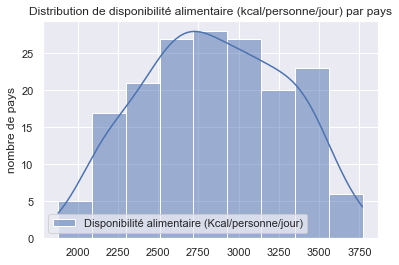

In [41]:
sns.set()
kal=sns.histplot(pivot_dispo_alimentaire, kde=True)
plt.title('Distribution de disponibilité alimentaire (kcal/personne/jour) par pays')
kal.set(ylabel = 'nombre de pays')
plt.show()

## Disponibilité de protéines en quantité (g/personne/jour)

In [42]:
pivot_prot_dispo_alimentaire=dispo_alimentaire.pivot_table('Disponibilité de protéines en quantité (g/personne/jour)',
                                                           index='Zone',
                                                           columns='Origine',
                                                           aggfunc='sum',
                                                           margins=True)
pivot_prot_dispo_alimentaire.drop(index='All', inplace=True)
pivot_prot_dispo_alimentaire.sort_values(['All'], ascending=True).head(10)


Origine,animale,vegetale,All
Zone,,,
Libéria,8.14,29.52,37.66
Guinée-Bissau,8.90,35.15,44.05
Mozambique,6.34,39.34,45.68
République centrafricaine,17.12,28.92,46.04
Madagascar,10.03,36.66,46.69
Haïti,10.15,37.55,47.70
Zimbabwe,11.76,36.56,48.32
Congo,22.24,29.17,51.41
Ouganda,12.38,40.26,52.64


In [43]:
pivot_prot_dispo_alimentaire.sort_values(['All'], ascending=False).head(10)

Origine,animale,vegetale,All
Zone,,,
Islande,96.48,36.58,133.06
Chine - RAS de Hong-Kong,94.40,34.67,129.07
Israël,72.46,55.54,128.00
Lituanie,76.49,47.87,124.36
Maldives,85.97,36.35,122.32
Finlande,73.03,44.53,117.56
Luxembourg,72.12,41.47,113.59
Monténégro,63.11,48.79,111.90
Pays-Bas,75.76,35.70,111.46


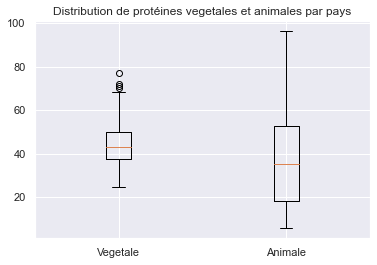

In [44]:
fig, ax = plt.subplots()
ax.boxplot([pivot_prot_dispo_alimentaire['vegetale'], pivot_prot_dispo_alimentaire['animale']])
ax.set_xticklabels(['Vegetale', 'Animale'])
plt.title('Distribution de protéines vegetales et animales par pays')
plt.show()

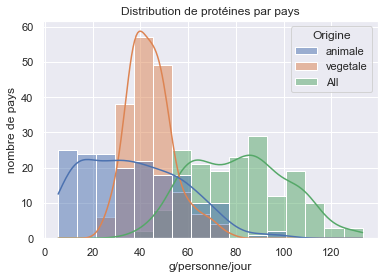

In [45]:
prot=sns.histplot(pivot_prot_dispo_alimentaire, kde=True)

plt.title('Distribution de protéines par pays')
prot.set(xlabel='g/personne/jour', ylabel = 'nombre de pays')
# plt.savefig('dispo_prot.png', transparent=True)
plt.show()

La distribution des protéines vegetales est plutot normale. Les pays les plus pauvres ne possèdent pas beaucoup moins des protéines vegetales que les pays riches. La situation est différente pour les protéines animales. Les pays riches se démarquent des autres

## Disponibilité de matière grasse en quantité (g/personne/jour)¶

In [46]:
pivot_gras_dispo_alimentaire=dispo_alimentaire.pivot_table('Disponibilité de matière grasse en quantité (g/personne/jour)',
                                                           index='Zone',
                                                           columns='Origine',
                                                           aggfunc='sum',
                                                           margins=True)
pivot_gras_dispo_alimentaire.drop(index='All', inplace=True)
pivot_gras_dispo_alimentaire.sort_values(['All'], ascending=False).head(10)

Origine,animale,vegetale,All
Zone,,,
Autriche,92.46,77.98,170.44
Belgique,94.15,67.80,161.95
États-Unis d'Amérique,67.69,93.66,161.35
France,93.82,65.33,159.15
Italie,68.33,86.36,154.69
Suisse,89.70,63.65,153.35
Israël,49.65,101.74,151.39
Islande,105.50,45.85,151.35
Australie,74.35,76.46,150.81


In [47]:
pivot_gras_dispo_alimentaire.sort_values(['All'], ascending=True).head(10)

Origine,animale,vegetale,All
Zone,,,
Rwanda,4.03,19.74,23.77
Madagascar,10.13,14.36,24.49
Éthiopie,8.01,17.88,25.89
Bangladesh,5.92,24.00,29.92
Lesotho,10.87,21.39,32.26
Afghanistan,15.23,18.27,33.50
Cambodge,13.74,22.19,35.93
République populaire démocratique de Corée,9.34,27.07,36.41
République démocratique populaire lao,16.88,21.98,38.86


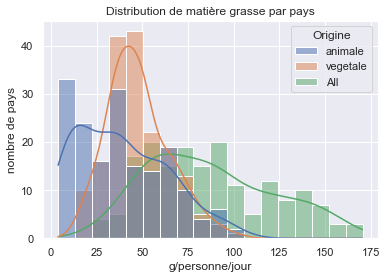

In [48]:
gras=sns.histplot(pivot_gras_dispo_alimentaire, kde=True)
plt.title('Distribution de matière grasse par pays')
gras.set(xlabel='g/personne/jour', ylabel = 'nombre de pays')
plt.show()

La situation avec des matières grasses ressemble à celle avec des protèines. La distribution des matières grasses vegetales est plutot normale. L'inégalité de la distribution des matières grasses animales est beaucoup plus perceptible

## Question N°5 : Quels sont les pays avec des personnes en sous-nutrition qui exportent de grandes quantités de produits alimentaires (2013) 

In [49]:
# on choisit seulement les données concernant les pays où il y a des personnes en sous-nutrition 

sous_nutrition_2013=sous_nutrition[sous_nutrition['Année']==2013].drop(columns='Année')


In [50]:
# on ajoute le nombre des personnes en sous-nutrition et la population
disp_sous_nutr=pd.merge(pd.merge(sous_nutrition_2013, population_2013, how='left', on='Zone'),
                        dispo_alimentaire, how='left', on='Zone').drop(columns=['Disponibilité alimentaire en quantité (kg/personne/an)',
                                                                                'Disponibilité de matière grasse en quantité (g/personne/jour)',
                                                                                'Disponibilité de protéines en quantité (g/personne/jour)']) 
disp_sous_nutr.rename(columns={'Valeur_x': 'Personnes en sous-nutrition', 'Valeur_y': 'Population'}, inplace=True)
disp_sous_nutr.set_index('Zone', inplace=True)

In [51]:
# on choisit la disponibilité alimentaire des produits principaux
disp_sous_nutr=disp_sous_nutr[~disp_sous_nutr['Produit'].isin(['Sucre, canne', 'Sucre Eq Brut', 'Huile de Palme', 'Bière', 'Sucre, betterave', 'Graines de coton', 'Graines Colza/Moutarde', 'Huile de Soja', 'Sucre non centrifugé', 'Alcool, non Comestible', 'Boissons Alcooliques', 'Huile de Palmistes', 'Café', 'Beurre, Ghee', 'Vin', 'Épices, Autres', 'Feve de Cacao', 'Huile de Colza&Moutarde', 'Thé', 'Edulcorants Autres', 'Huile de Coco', 'Piments', 'Huile de Tournesol', 'Huile d\'Arachide', 'Huile Graines de Coton', 'Huil Plantes Oleif Autr', 'Huile de Son de Riz', 'Huile de Sésame', 'Huiles de Poissons', 'Miel', 'Huile d\'Olive', 'Poivre', 'Huile de Germe de Maïs', 'Crème', 'Girofles', 'Huiles de Foie de Poisso'])]

In [52]:
# estimation des produit 
disp_sous_nutr=disp_sous_nutr[disp_sous_nutr['Production']!=0]

In [53]:
# on va créer une nouvelle colonne avec la valeur énergétique pour mille tonnes 

In [54]:
# pour les tuples sans information sur la valeur énergétique on va mettre NaN pour l'instant (ensuite on les remplira avec les valeurs moyennes de chaque produit)
disp_sous_nutr['Kcal dans mille tonnes'] = np.where((disp_sous_nutr['Disponibilité alimentaire (Kcal/personne/jour)']!= 0) & (disp_sous_nutr['Nourriture']!= 0), ((disp_sous_nutr['Population']*1000*365*disp_sous_nutr['Disponibilité alimentaire (Kcal/personne/jour)'])/disp_sous_nutr['Nourriture']), float('NAN'))

In [55]:
# on remplit NaN avec les valeurs moyennes de chaque produit
disp_sous_nutr=disp_sous_nutr.groupby('Produit').apply(lambda x : x.fillna(x.mean())).reset_index(level=0,drop=True).sort_index()

In [56]:
# on va calculer combien de personnes le pays aurrait pu nourrir s'il n'avait pas exporté ce produit (les valeurs absolue et relative)
disp_sous_nutr['№ Personnes on peut nourrir']=disp_sous_nutr['Kcal dans mille tonnes']*disp_sous_nutr['Production']/1000/2300/365
disp_sous_nutr['Proportion de la population qu\'on peut nourrir']=disp_sous_nutr['№ Personnes on peut nourrir']/disp_sous_nutr['Population']

In [57]:
# on prend top 10 pays avec la plus grande exportation
disp_sous_nutr[['Personnes en sous-nutrition', 'Population', 'Produit', 'Exportations - Quantité', 'Nourriture', 'Traitement', 'Production', '№ Personnes on peut nourrir', 'Proportion de la population qu\'on peut nourrir']].sort_values(['Exportations - Quantité'], ascending=False).head(10)


,Personnes en sous-nutrition,Population,Produit,Exportations - Quantité,Nourriture,Traitement,Production,№ Personnes on peut nourrir,Proportion de la population qu'on peut nourrir
Zone,,,,,,,,,
Thaïlande,6200.0,68144.518,Manioc,25214.0,871.0,0.0,30228.0,41129.585985,0.603564
Argentine,1200.0,42196.030,Maïs,20241.0,433.0,464.0,32119.0,117035.152858,2.773606
Inde,203800.0,1280842.125,Riz (Eq Blanchi),11337.0,87006.0,368.0,106186.0,468279.393020,0.365603
Viet Nam,8900.0,90752.592,Manioc,8973.0,742.0,0.0,9758.0,11415.916700,0.125792
Argentine,1200.0,42196.030,Soja,7783.0,0.0,34041.0,49306.0,204152.843372,4.838200
Kazakhstan,500.0,17026.117,Blé,7442.0,1518.0,161.0,13941.0,49152.796357,2.886906
Inde,203800.0,1280842.125,Blé,7168.0,75833.0,0.0,93510.0,355024.340414,0.277180
Viet Nam,8900.0,90752.592,Riz (Eq Blanchi),6951.0,13253.0,362.0,29374.0,121561.176501,1.339479
Thaïlande,6200.0,68144.518,Riz (Eq Blanchi),6860.0,7677.0,1130.0,24054.0,105735.927234,1.551642


Trois pays sont les plus remarquables : Thaïlande (dont on a déjà parlé), Argentine avec son production du Maïs et du Soja, Inde avec son production du Riz et du Blé. Seulement Manioc produit en Thaïlande pourrait nourrir 60% de la population de ce pays. Le Maïs et le Soja produits en Argentine pourraient nourrir 760% de la population de ce pays. Le Riz et le Blé produits en Inde pourraient nourrir 64% de la population de ce pays. Pourtant, l'Inde n'exporte que 10% de ces produits.

Les chiffres du VietNam sont semblable à la Thaïlande. Ils exportent la plupart du Manioc produit qui pourrait nourrir les personnes en sous-nutrition de ce pays. Le Kazakhstan connait la même situation avec l'exportation du blé.


## Question N°6 : La répartition des personnes en sous-nutrition par continent (2017)

In [58]:
sous_nutr_cont=pd.merge(pd.merge(sous_nutrition_2017, population_2017,
                                 how='right',
                                 on='Zone'),
                        continent,
                        how='left', on='Zone')
sous_nutr_cont.rename(columns={'Valeur_x': 'Personnes en sous-nutrition', 'Valeur_y': 'Population'}, 
                      inplace=True)
sous_nutr_cont.set_index('Zone', inplace=True)
sous_nutr_cont.fillna(0, inplace=True)

In [59]:
sous_nutr_group=sous_nutr_cont.groupby('Continent').agg({'Personnes en sous-nutrition': np.sum, 'Population': np.sum})
sous_nutr_group['Proportion']=sous_nutr_group['Personnes en sous-nutrition']/sous_nutr_group['Population']
sous_nutr_group.drop(columns='Population', inplace=True)
sous_nutr_group

,Personnes en sous-nutrition,Proportion
Continent,,
Afrique,148600.0,0.119432
Amériques,39600.0,0.039660
Asie,345000.0,0.076344
Europe,2500.0,0.003354
Océanie,0.0,0.000000


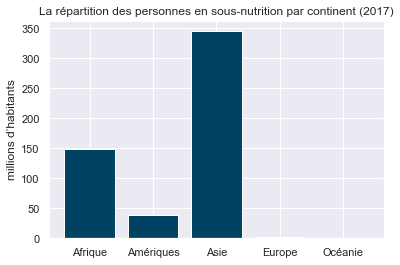

In [60]:
fig, ax=plt.subplots()
ax.bar([1,2,3,4,5], sous_nutr_group['Personnes en sous-nutrition'], tick_label=['Afrique', 'Amériques', 'Asie', 'Europe', 'Océanie'], color='#014263ff')
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('millions d’habitants')
plt.title('La répartition des personnes en sous-nutrition par continent (2017)')
#plt.savefig('rep_pers_cont.png', transparent=True)
plt.show()

La plupart de personnes en état de sous-nutrition se trouvent en Asie.


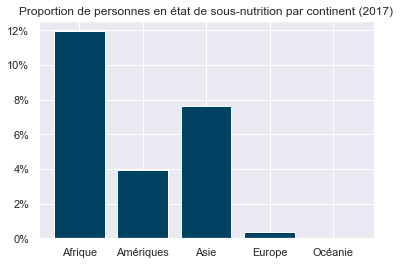

In [61]:
fig, ax=plt.subplots()
ax.bar([1,2,3,4,5], sous_nutr_group['Proportion'], tick_label=['Afrique', 'Amériques', 'Asie', 'Europe', 'Océanie'], color='#014263ff')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
plt.title('Proportion de personnes en état de sous-nutrition par continent (2017)')
#plt.savefig('prop_cont.png', transparent=True, bbox_inches='tight')
plt.show()

La plupart de personnes en état de sous-nutrition se trouvent en Asie.


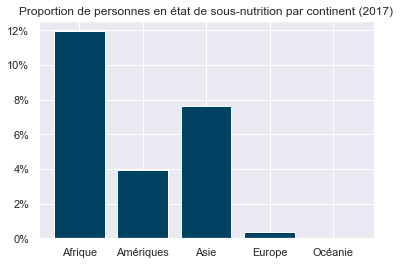

In [62]:
fig, ax=plt.subplots()
ax.bar([1,2,3,4,5], sous_nutr_group['Proportion'], tick_label=['Afrique', 'Amériques', 'Asie', 'Europe', 'Océanie'], color='#014263ff')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
plt.title('Proportion de personnes en état de sous-nutrition par continent (2017)')
#plt.savefig('prop_cont.png', transparent=True, bbox_inches='tight')
plt.show()

L'Afrique est le continent avec la plus grande proportion de personnes en état de sous-nutrition (11,9%). L'Asie se trouve sur la deuxième place avec 7,6% de population en état de sous-nutrition

## Question N°7 L'évolution du nombre de personnes en sous-nutrition et leur proportion (2013-2018) 

In [63]:
sous_nutr_annee=pd.merge(sous_nutrition, population, how='right', on=['Zone', 'Année'])
sous_nutr_annee.rename(columns={'Valeur_x': 'Personnes en sous-nutrition', 'Valeur_y': 'Population'}, inplace=True)
sous_nutr_annee.fillna(0, inplace=True)
sous_nutr_group_annee=sous_nutr_annee.groupby('Année').agg({'Personnes en sous-nutrition': np.sum, 'Population': np.sum})
sous_nutr_group_annee['Proportion']=sous_nutr_group_annee['Personnes en sous-nutrition']/sous_nutr_group_annee['Population']
sous_nutr_group_annee.drop(columns='Population', inplace=True)
sous_nutr_group_annee

,Personnes en sous-nutrition,Proportion
Année,,
2013,528100.0,0.073237
2014,523500.0,0.071756
2015,524700.0,0.071097
2016,528600.0,0.070817
2017,535700.0,0.070971
2018,544200.0,0.071311


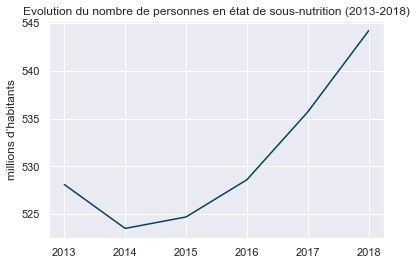

In [64]:
fig, ax=plt.subplots()
ax.plot(sous_nutr_group_annee['Personnes en sous-nutrition'], color = "#014263ff")
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('millions d’habitants')
plt.title('Evolution du nombre de personnes en état de sous-nutrition (2013-2018)')
#plt.savefig('evol_nomb.png', transparent=True, bbox_inches='tight')
plt.show()

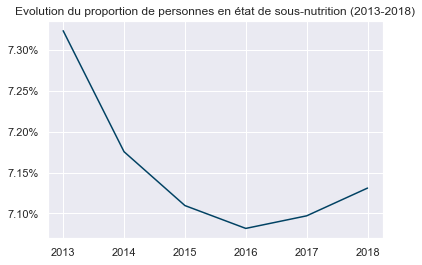

In [65]:
fig, ax=plt.subplots()
ax.plot(sous_nutr_group_annee['Proportion'], color = "#014263ff")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=2))
plt.title('Evolution du proportion de personnes en état de sous-nutrition (2013-2018)')
#plt.savefig('evol_prop.png', transparent=True, bbox_inches='tight')
plt.show()

Question N°8 : L'évolution du nombre de personnes en sous-nutrition et leur proportion par continent (2013-2018)

In [66]:
sous_nutr_annee_cont=pd.merge(sous_nutr_annee, continent, how='left', on='Zone')
pivot_sous_nutr_annee_cont=sous_nutr_annee_cont.pivot_table('Personnes en sous-nutrition', index='Année', columns='Continent', aggfunc='sum')
pivot_sous_nutr_annee_cont

Continent,Afrique,Amériques,Asie,Europe,Océanie
Année,,,,,
2013,134900.0,31700.0,360600.0,900.0,0.0
2014,136100.0,31200.0,355200.0,1000.0,0.0
2015,138600.0,34300.0,349500.0,2300.0,0.0
2016,144700.0,37100.0,345700.0,1100.0,0.0
2017,148600.0,39600.0,345000.0,2500.0,0.0
2018,153700.0,41900.0,346000.0,2600.0,0.0


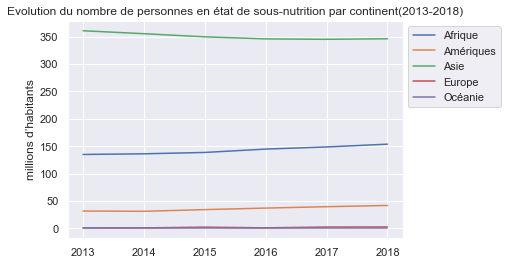

In [67]:
fig, ax=plt.subplots()
ax.plot(pivot_sous_nutr_annee_cont)
plt.title('Evolution du nombre de personnes en état de sous-nutrition par continent(2013-2018)')
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('millions d’habitants')
plt.legend(['Afrique', 'Amériques', 'Asie', 'Europe', 'Océanie'], bbox_to_anchor =(1, 1))
plt.show()

In [68]:
pivot_sous_nutr_prop_cont1=sous_nutr_annee_cont.pivot_table('Population',
                                                            index='Année',
                                                            columns='Continent',
                                                            aggfunc='sum')
pivot_sous_nutr_prop_cont2=sous_nutr_annee_cont.pivot_table('Personnes en sous-nutrition',
                                                            index='Année',
                                                            columns='Continent',
                                                            aggfunc='sum')
pivot_sous_nutr_prop_cont3=pivot_sous_nutr_prop_cont2/pivot_sous_nutr_prop_cont1
pivot_sous_nutr_prop_cont3

Continent,Afrique,Amériques,Asie,Europe,Océanie
Année,,,,,
2013,0.120120,0.032909,0.082986,0.001215,0.0
2014,0.118098,0.032087,0.080917,0.001348,0.0
2015,0.117215,0.034955,0.078832,0.003095,0.0
2016,0.119287,0.037476,0.077224,0.001478,0.0
2017,0.119432,0.039660,0.076344,0.003354,0.0
2018,0.120462,0.041616,0.075866,0.003483,0.0


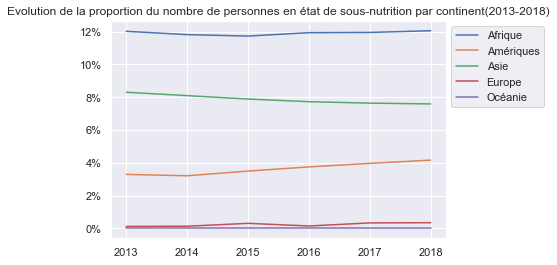

In [69]:
fig, ax=plt.subplots()
ax.plot(pivot_sous_nutr_prop_cont3)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
plt.title('Evolution de la proportion du nombre de personnes en état de sous-nutrition par continent(2013-2018)')
plt.legend(['Afrique', 'Amériques', 'Asie', 'Europe', 'Océanie'], bbox_to_anchor =(1, 1))
plt.show()